In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
df = pd.read_csv('economic_index_monthly.csv')
df.head()


,year,month,interest_rate,unemployment_rate,index_price
0,2022,1,2.95,8.58,96.81
1,2022,2,6.77,7.68,84.80
2,2022,3,8.26,2.94,78.50
3,2022,4,5.77,5.68,54.86
4,2022,5,5.53,4.65,80.75


In [8]:
df.drop(columns=['year','month'],axis=1,inplace=True)
df.head()

,interest_rate,unemployment_rate,index_price
0,2.95,8.58,96.81
1,6.77,7.68,84.80
2,8.26,2.94,78.50
3,5.77,5.68,54.86
4,5.53,4.65,80.75


In [9]:
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

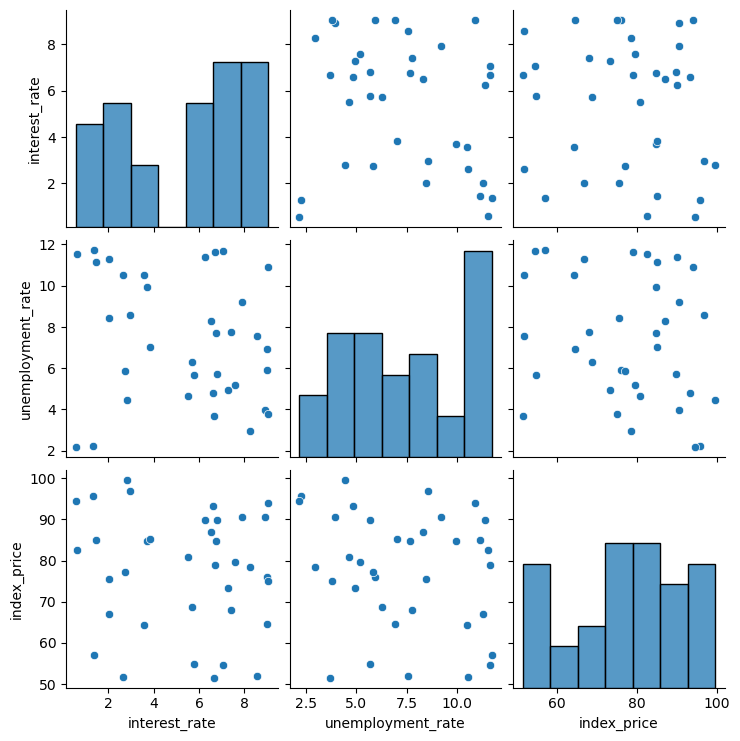

In [10]:
import seaborn as sns
sns.pairplot(df)
plt.show()

In [11]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.208055,-0.112295
unemployment_rate,-0.208055,1.000000,-0.213720
index_price,-0.112295,-0.213720,1.000000


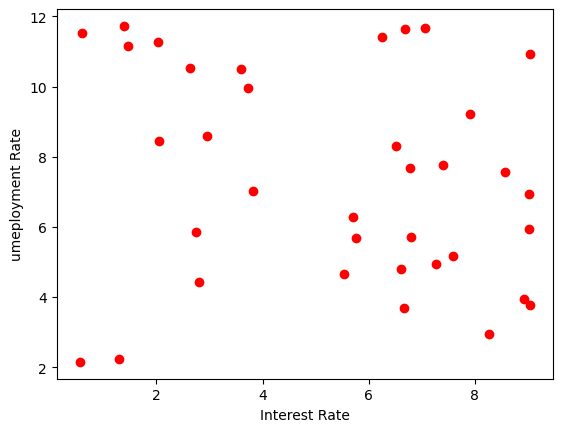

In [12]:
plt.scatter(df['interest_rate'],df['unemployment_rate'],color='r')
plt.xlabel("Interest Rate")
plt.ylabel("umeployment Rate")
plt.show()

In [13]:
X= df.iloc[:,:-1]
y=df.iloc[:,-1]

In [14]:
X.head()

,interest_rate,unemployment_rate
0,2.95,8.58
1,6.77,7.68
2,8.26,2.94
3,5.77,5.68
4,5.53,4.65


In [15]:
y


0     96.81
1     84.80
2     78.50
3     54.86
4     80.75
5     99.50
6     57.00
7     75.92
8     93.87
9     87.04
10    84.85
11    85.12
12    67.97
13    64.68
14    90.47
15    90.51
16    93.35
17    95.66
18    75.57
19    75.08
20    89.91
21    82.50
22    85.10
23    89.79
24    94.50
25    66.90
26    68.78
27    54.70
28    78.91
29    51.80
30    73.28
31    77.13
32    64.33
33    79.54
34    51.53
35    51.87
Name: index_price, dtype: float64

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.25,random_state=42)

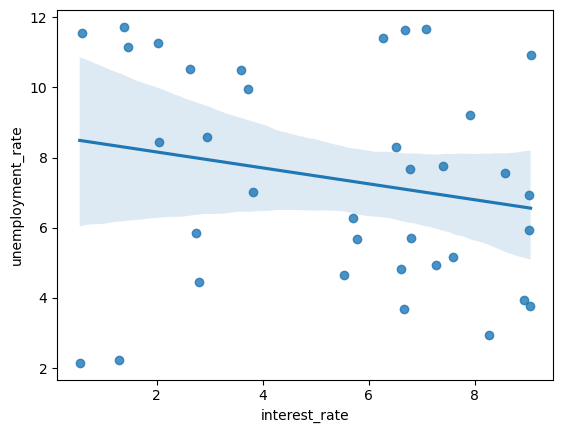

In [20]:
import seaborn as sns
sns.regplot(x=df['interest_rate'],y=df['unemployment_rate'])
plt.show()

In [21]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [24]:
X_train

array([[-1.42022176, -1.61229429],
       [ 0.53862318,  0.28925228],
       [ 0.59877964, -1.15805335],
       [-0.7998582 ,  0.37383508],
       [ 0.17016482, -0.85731452],
       [-0.92017113,  0.98471083],
       [ 1.06499226,  0.57432763],
       [ 1.4898473 , -1.13299178],
       [-0.85625489, -0.92310114],
       [-0.47275742, -0.11173283],
       [ 0.63637743,  0.09189242],
       [-1.7022052 , -1.64048856],
       [ 1.19658453, -1.39300556],
       [ 0.94467932, -0.69441432],
       [ 0.26039952, -0.53464681],
       [-0.55923234,  0.97844543],
       [ 0.64765677, -0.52838142],
       [ 0.74917081,  1.34183819],
       [-0.51035521,  0.80301445],
       [-1.36006529,  1.17893799],
       [-1.1419981 ,  0.33311003],
       [-1.14575788,  1.21966304],
       [-1.39014353,  1.36063437],
       [ 0.4446287 ,  1.25725539],
       [ 1.48232774, -0.45632941],
       [ 1.44848973, -1.07660325],
       [ 0.6062992 ,  1.3324401 ]])

In [25]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [26]:
regression.fit(X_train,y_train)

LinearRegression()

In [28]:
from sklearn.model_selection import cross_val_score ### its like suffling the dataset and checking its prediction or comparing it with what we got
validation_score = cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=3)

In [30]:
np.mean(validation_score)

-209.62378524013465

In [35]:
####prediction
y_pred = regression.predict(X_test) ###so here we are asking it to predict based on regression values the y means index_value
y_pred  

array([76.79035287, 77.85861405, 81.21971075, 83.08308329, 83.76013645,
       83.9086466 , 73.29888636, 77.07849795, 69.48540501])

In [36]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [37]:
###so here we are comparing predicated value with real valaues and finding error betwen them
mse = mean_squared_error(y_test,y_pred)
mae= mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

216.1884371035168
13.267164189442747
14.70334781957894


In [38]:
from sklearn.metrics import r2_score

In [39]:
score = r2_score(y_test,y_pred)
print(score)

-0.3094574868139339


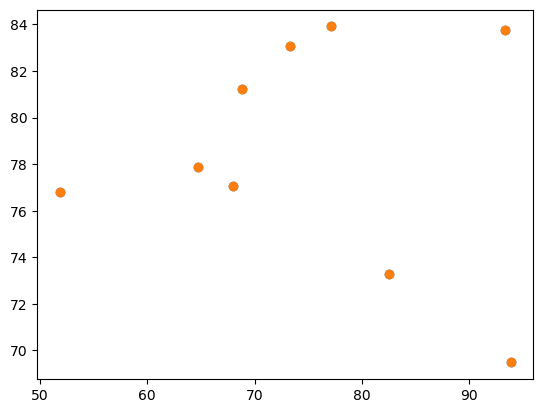

In [41]:
###Asumptions
plt.scatter(y_test,y_pred)
plt.show()

In [42]:
residuals=y_test-y_pred
print(residuals)

35   -24.920353
13   -13.178614
26   -12.439711
30    -9.803083
16     9.589864
31    -6.778647
21     9.201114
12    -9.108498
8     24.384595
Name: index_price, dtype: float64


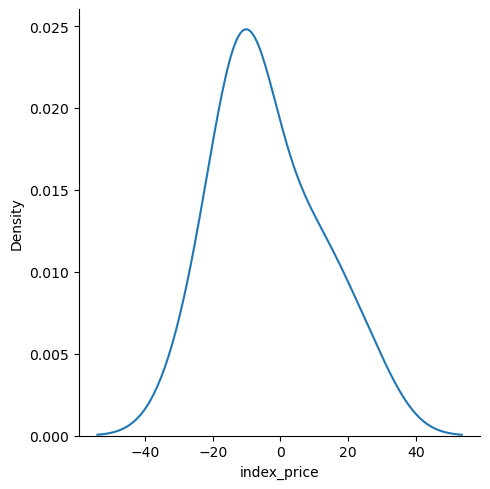

In [46]:
#####plot the residuals
sns.displot(residuals,kind='kde')
plt.show()

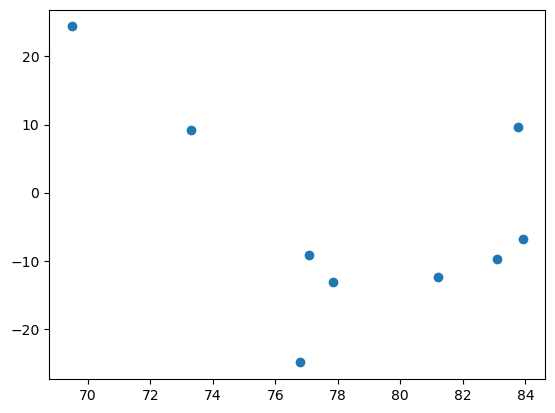

In [47]:
#### Scatter plot
plt.scatter(y_pred,residuals)
plt.show()

In [48]:
print(regression.coef_)
print(regression.intercept_)

[-1.659664   -4.75119814]
78.49814814814815
